# Seminar for Linear Regression 8/6
## 注意事项:
在本次研讨会中，你极大可能会看到：

- **逆天言论**；~~~啊？~~~
- **抽象代码**； ~~~:3~~~
- **错误推导**；~~~0.o?~~~
- **刻意提问**；~~~0.0 啊？~~~
- **奇妙比喻**；~~~说的道理~~~

让我们一起开始研究线性回归罢！

# 1.引言
线性回归是统计学中一种常用的分析方法，一般拿来理解变量之间的关系，并且可以用来预测一个变量（一般叫因变量）如何随着其他一个或多个变量（一般叫自变量）的变化而变化。

**线性**指的是模型中的关系是通过一条直线来表示的。这意味着，当我们绘制自变量和因变量之间的关系时，数据点大致分布在一条直线附近，表明两个变量之间的关系是近似线性的。但需要注意的是，线性回归模型并不仅仅适用于真正的直线关系，它还可以通过一些数学变换来适应更复杂的情况。

**回归**是一种统计分析方法，用于探究自变量和因变量之间的关系。在线性回归中，我们试图找到一条直线，它最好地拟合了数据中的观察点，以最小化预测值与实际观测值之间的误差。这条拟合的直线可以用方程表示为：

$$
y = b_0 + b_1 \cdot x
$$

其中，$ y $ 是因变量的预测值，$ x $ 是自变量的值，$ b_0 $ 是截距，$ b_1 $ 是斜率。线性回归的目标是找到最合适的 $ b_0 $ 和 $ b_1 $ 值，使得预测值与实际观测值的误差最小。

线性回归的步骤包括：
1. 收集数据：收集自变量和因变量的数据。
2. 拟合模型：通过最小化误差来找到最合适的直线，即找到最合适的 $b_0$ 和 $b_1$ 值。
3. 预测：利用拟合的模型来预测新的因变量值，基于给定的自变量值。

但是，线性回归模型的适用性取决于数据的性质，以及自变量和因变量之间是否存在线性关系。如果数据呈现出非线性的关系，可能需要考虑其他类型的回归模型来更好地拟合数据。

**过拟合**：

过拟合的定义？
过拟合则是指模型在训练数据上表现得过于优秀，以至于在新的、未见过的数据上表现不佳。这种情况常常会导致模型在真实世界中的泛化能力下降。

为什么会出现过拟合？
过拟合通常出现在模型过于复杂或者训练数据相对较少的情况下。模型过于复杂，意味着它具有大量的参数，能够在训练数据中捕捉到细微的噪音或随机性，从而在训练数据上达到很高的准确度。然而，当面对新的数据时，这些细微的特征可能并不代表真实的关系，导致模型表现不佳。这就好比一个人平时作业100分，但在考试的时候就样衰了。（哎呀怎么回事呢？）

为了解决过拟合问题，我们可以采取以下方法：
- 简化模型复杂度： 减少模型的参数数量，限制模型的容量，从而减少模型捕捉噪音的可能性。（奥卡姆剃刀原理）
- 增加数据量： 更多的训练数据可以帮助模型更好地理解数据背后的真实分布，减少对随机性的过分依赖。（十万条数据！海虎线性回归！）
- 正则化： 添加正则化项，如L1正则化或L2正则化，可以在损失函数中惩罚模型的复杂度，促使模型更倾向于学习简单的关系。（哇，我不要算呀！）
- 交叉验证： 使用交叉验证来评估模型的性能，确保模型在不同的数据子集上表现一致，而不仅仅是在训练数据上表现好。（战！）



# 2. 对比
当然，对于部分修读过STAT2040的同学们而言，这本书提到的线性回归内容和我们先前学习的内容是有些不一样的：

在PRML中,线性回归部分主要内容包括:

- 从概率角度出发,建立线性回归模型,给出参数估计的最大似然法推导;
- 讨论了线性回归的各种假设,如高斯噪声模型、输入独立等;
- 介绍了不同的线性基函数,如多项式回归等;
- 提出了正则化的概念,讲解了岭回归和LASSO回归等正则方法;

在ISL2(STAT2040)中,线性回归部分涵盖的主要内容有:

- 简单线性回归模型的建立,最小二乘法的参数估计推导;
- 多元线性回归模型的表达形式;
- 模型评估方法,如R平方、残差分析;
- 使用R语言实现线性回归,配有大量的代码示例;

**PRML更强调线性回归理论体系的构建与模型本身的探讨;**
**ISL更注重线性回归的实际应用,通过大量例子帮助读者掌握运用的技能。**

**参数**：
1. **$β$Beta：**
   - $β$ 表示线性回归模型中自变量的系数或权重。它代表着自变量对于因变量的影响程度。
   - 在单变量线性回归中，如果我们只有一个自变量 $x$，模型可以表示为 $y = β_0 + β_1x$，其中 $β_0$ 是截距，$β_1$ 是自变量 $x$ 的系数。
   - 在多变量线性回归中，如果有多个自变量 $x_1, x_2, \ldots, x_p$，模型可以表示为 $y = β_0 + β_1x_1 + β_2x_2 + \ldots + β_px_p$，其中 $β_i$ 是自变量 $x_i$ 的系数。

2. **$w$ Weights：**
   - $w$ 通常用于机器学习和神经网络等领域，表示模型中神经元或特征的权重。它也表示自变量对于因变量的影响程度.


## 3.1 线性基函数模型
## (Linear Basis Function Models)

最简单的回归线性模型是输入变量的线性组合：
$$
y(x,w) = w_0 + w_1x_1 + ... + w_Dx_D \quad (3.1)
$$
其中$${x = (x_1, ..., x_D)^T}$$
这个模型通常被人们称为线性回归（linear regression）。这个模型的关键属性是它是参数 $w_0, ..., w_D$的一个线性函数。然而，它也受到仅能表示输入变量 $x_i\ $的线性函数的限制。
那么我们如何克服这个局限性呢？我们可以使用基函数来对输入变量的非线性变换进行线性组合，以扩展模型的类别：

$$
y(x,w) = w_0 + \sum_{j=1}^{M-1} w_j\phi_j(x) \quad (3.2)
$$
其中 $$ Φ_j(x)\ $$被称为基函数。通过将下标$$j$$的最大值记为 $$M-1$$，模型的参数总数变为 $M$。



### 偏置参数和简化表示

为了引入固定偏移，通常会引入一个偏置参数 $$w_0$$，它可以使模型适应数据中的任意常数偏移。为了方便，可以引入一个虚拟的基函数 $Φ_0(x) = 1 \\$，从而将模型简化为：

$$
y(x,w) = \sum_{j=0}^{M-1} w_j\phi_j(x) = w^T\phi(x)\quad (3.3)
$$
其中 $w = (w_0, ..., w_{M-1})^T，\phi = (\phi_0, ..., \phi_{M-1})^T$。

### 非线性基函数和模型的灵活性

在实际应用中，常常对原始数据进行预处理或特征提取，以便更好地适应模型。

通过使用非线性的基函数，我们可以使函数 $y(x,w)$ 成为关于输入向量 $x$ 的非线性函数。尽管公式$3.2$关于参数 $w$ 是线性的，但由于基函数的非线性变换，模型本身变得非线性。然而，这种参数的线性性质使得模型的分析变得更加简单。需要注意的是，这种方法仍然受到3.6节中讨论的一些限制。

### 不同的基函数选择

多项式拟合是线性基函数模型的一个特例，其中基函数是输入变量的幂指数，即$Φ_(x) = x^j$。

然而，多项式基函数的一个局限性在于它们是输入变量的全局函数，因此在一个区域内的变化会影响所有区域。为了解决这个问题，可以将输入空间分割成多个区域，然后在每个区域内使用不同的多项式函数进行拟合。这种方法产生的函数被称为样条函数（spline function）。

当然啦，我们还可以选择许多其他基函数，比如高斯基函数:
$$
Φ_{j}(x) = \exp \left\{-\frac{\left(x-\mu_{j}\right)^{2}}{2 s^{2}}\right\}
$$


 或者 sigmoid 基函数:
$$
Φ_j(x) = \sigma\left(\frac{x-\mu_j}{s}\right)
$$
其中$\sigma(a)$ 是 logistic sigmoid 函数。

<center> <img alt="image-20230806072137721" src="image-20230806072137721.png"/> </center>

### 日后谈
其实本章并没有花多少文笔教你如何选择基函数。作者为了简化公式而选择使用基函数向量 $\phi(x)$ 的简单形式，例如 $Φ(x) = x$，来保持符号简洁。

我们可以通过选择合适的基函数灵活地调整模型的复杂性和能力，以更好地适应不同的数据。

**问题**：
假设现在有小猫Max，我们记录了他从出生开始到第十个月的饭量。现在小猫11个月大了，我们应该买多少猫粮呢？现在我们又应该选择什么基函数呢？
<img alt="猫儿max" src="猫儿max.jpg"/>

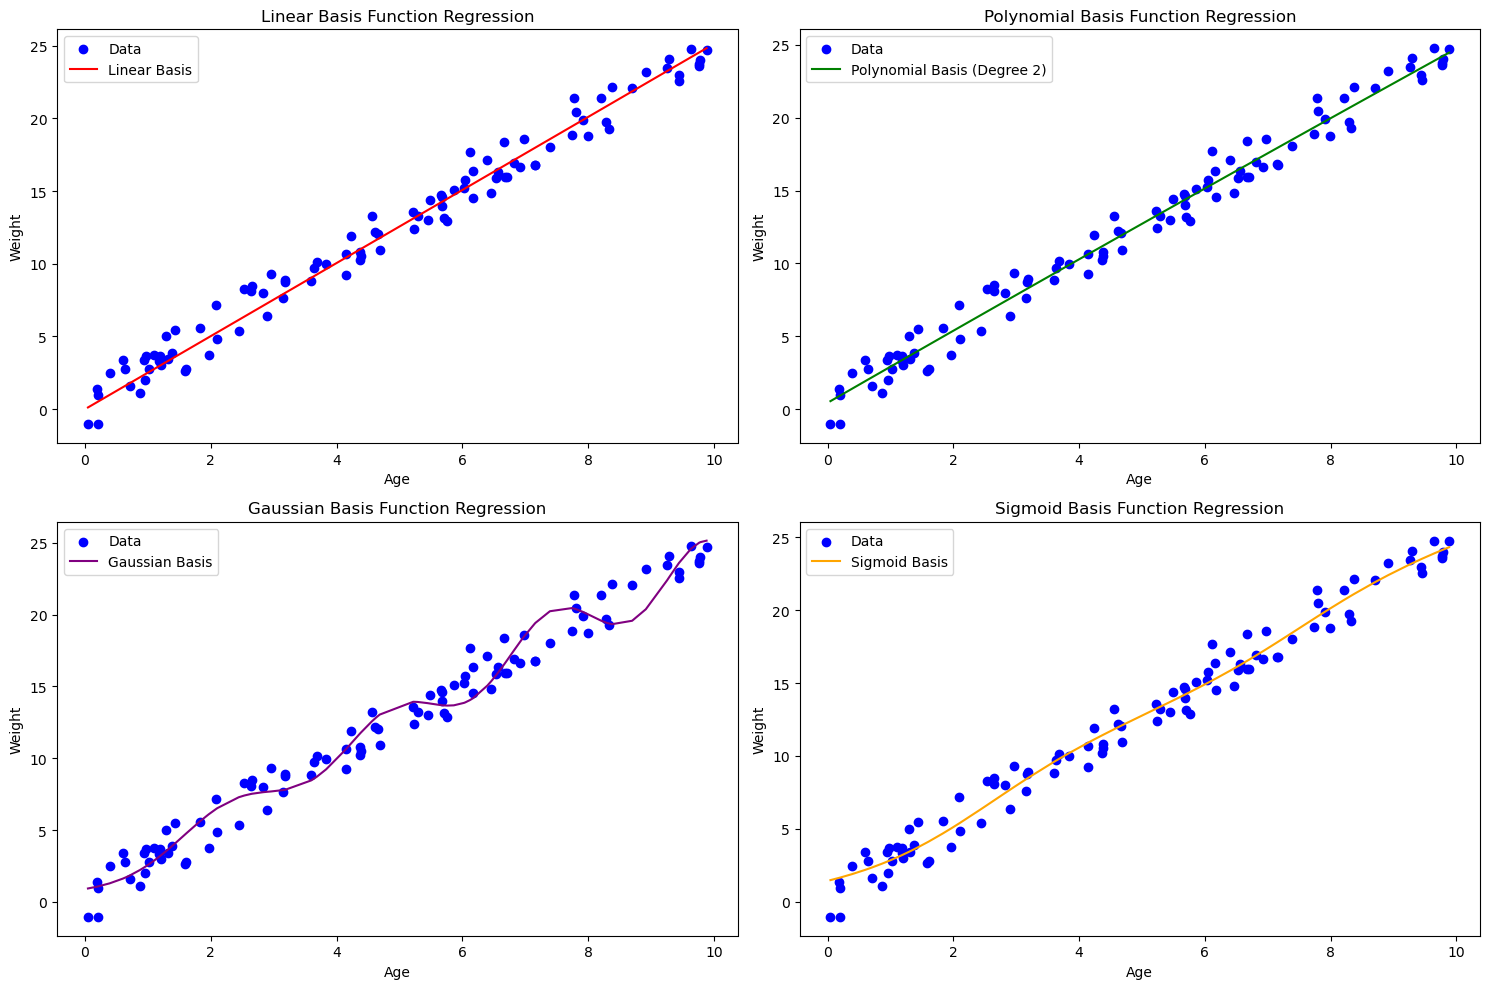

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# 生成模拟数据
np.random.seed(0)
age = np.sort(np.random.uniform(0, 10, 100))  # 小猫的年龄（月）
weight = 2.5 * age + np.random.normal(0, 1, 100)  # 小猫吃，带有一些随机噪音

# 线性基函数
X_linear = age[:, np.newaxis]  # 将年龄转换为矩阵形式
w_linear = np.linalg.lstsq(X_linear, weight, rcond=None)[0]  # 线性回归参数
weight_pred_linear = X_linear.dot(w_linear)  # 预测的体重

# 多项式基函数
degree = 2  # 多项式的次数
X_poly = np.vander(age, degree + 1, increasing=True)  # 生成多项式基函数矩阵
w_poly = np.linalg.lstsq(X_poly, weight, rcond=None)[0]  # 多项式回归参数
weight_pred_poly = X_poly.dot(w_poly)  # 预测的体重

# 高斯基函数
centers = np.linspace(0, 10, 5)  # 高斯基函数的中心点
s = 1.0  # 高斯基函数的标准差
X_gaussian = np.exp(-(age[:, np.newaxis] - centers)**2 / (2 * s**2))  # 生成高斯基函数矩阵
w_gaussian = np.linalg.lstsq(X_gaussian, weight, rcond=None)[0]  # 高斯基函数回归参数
weight_pred_gaussian = X_gaussian.dot(w_gaussian)  # 预测的体重

# Sigmoid 基函数
centers_sigmoid = np.linspace(0, 10, 5)  # Sigmoid 基函数的中心点
s_sigmoid = 1.0  # Sigmoid 基函数的尺度参数
X_sigmoid = 1 / (1 + np.exp(-(age[:, np.newaxis] - centers_sigmoid) / s_sigmoid))  # 生成 Sigmoid 基函数矩阵
w_sigmoid = np.linalg.lstsq(X_sigmoid, weight, rcond=None)[0]  # Sigmoid 基函数回归参数
weight_pred_sigmoid = X_sigmoid.dot(w_sigmoid)  # 预测的体重

# 可视化结果
plt.figure(figsize=(15, 10))

# 线性基函数
plt.subplot(2, 2, 1)
plt.scatter(age, weight, label='Data', color='blue')
plt.plot(age, weight_pred_linear, label='Linear Basis', color='red')
plt.xlabel('Age')
plt.ylabel('Weight')
plt.title('Linear Basis Function Regression')
plt.legend()

# 多项式基函数
plt.subplot(2, 2, 2)
plt.scatter(age, weight, label='Data', color='blue')
plt.plot(age, weight_pred_poly, label=f'Polynomial Basis (Degree {degree})', color='green')
plt.xlabel('Age')
plt.ylabel('Weight')
plt.title('Polynomial Basis Function Regression')
plt.legend()

# 高斯基函数
plt.subplot(2, 2, 3)
plt.scatter(age, weight, label='Data', color='blue')
plt.plot(age, weight_pred_gaussian, label='Gaussian Basis', color='purple')
plt.xlabel('Age')
plt.ylabel('Weight')
plt.title('Gaussian Basis Function Regression')
plt.legend()

# Sigmoid 基函数
plt.subplot(2, 2, 4)
plt.scatter(age, weight, label='Data', color='blue')
plt.plot(age, weight_pred_sigmoid, label='Sigmoid Basis', color='orange')
plt.xlabel('Age')
plt.ylabel('Weight')
plt.title('Sigmoid Basis Function Regression')
plt.legend()

plt.tight_layout()
plt.show()


## 3.1.1 极大似然估计与最小二乘法

## (Maximum Likelihood Estimation and Least Squares)

在这一小节中，我们将深入讨论线性基函数模型的参数估计方法，特别是使用极大似然估计和最小二乘法来确定参数。首先，我们从数据的生成方式开始，然后推导出极大似然估计下的参数估计公式。

### 数据生成与高斯噪声

假设我们的目标变量 \(t\) 是由确定函数 $y(\mathbf{x}, \mathbf{w})$加上高斯噪声产生的：
$$
t = y(\mathbf{x}, \mathbf{w}) + \epsilon \quad (3.7)
$$
其中 \($\epsilon$\) 是均值为0，精度（方差的逆）为 \($\beta$\) 的高斯随机变量。可以表示为：
$$
p(t|\mathbf{x}, \mathbf{w}, \beta) = \mathcal{N}(t|y(\mathbf{x}, \mathbf{w}), \beta^{-1}) \quad (3.8)
$$


### 极大似然估计

假设我们有一个数据集，包含输入集合 $\mathbf{X} = \{\mathbf{x}_1, \ldots, \mathbf{x}_N\}$ 和对应的目标值集合 $\mathbf{t} = \{t_1, \ldots, t_N\}$。通过假设这些数据是独立同分布地从分布$（3.8）$中抽取而得，我们可以得到可调参数 $\mathbf{w}$ 和 $\beta$ 下的极大似然函数：

$$
p(\mathbf{t}|\mathbf{X}, \mathbf{w}, \beta) = \prod_{n=1}^{N} \mathcal{N}(t_n|\mathbf{w}^\top \boldsymbol{\phi}(\mathbf{x}_n), \beta^{-1}) \quad (3.10)
$$
其中，$\boldsymbol{\phi}(\mathbf{x}_n)$ 是基函数向量。对上述似然函数取对数，并使用一元高斯分布的标准形式，可以得到：
$$
\ln p(\mathbf{t}|\mathbf{X}, \mathbf{w}, \beta) = \frac{N}{2} \ln \beta - \frac{N}{2} \ln (2\pi) - \frac{\beta}{2} E_D(\mathbf{w}) \quad (3.11)
$$


其中，平方和误差函数定义为：
$$
E_D(\mathbf{w}) = \frac{1}{2} \sum_{n=1}^{N} \{t_n - \mathbf{w}^\top \boldsymbol{\phi}(\mathbf{x}_n)\}^2 \quad (3.12)
$$


### 最小二乘法

通过最大化极大似然函数，我们可以得到参数的估计值。首先，对于参数 $\mathbf{w}$，我们可以发现在高斯条件分布下，最大似然估计等价于最小化平方和误差函数 $E_D(\mathbf{w})$，对似然函数的对数取梯度并令其为零，可以得到：
$$
\nabla \ln p(\mathbf{t}|\mathbf{X}, \mathbf{w}, \beta) = \beta \sum_{n=1}^{N} \{t_n - \mathbf{w}^\top \boldsymbol{\phi}(\mathbf{x}_n)\} \boldsymbol{\phi}(\mathbf{x}_n)^\top = 0 \quad (3.13)
$$


求解上述方程，我们得到参数 $\mathbf{w}$ 的最大似然估计：
$$
\mathbf{w}_{ML} = (\boldsymbol{\Phi}^\top \boldsymbol{\Phi})^{-1} \boldsymbol{\Phi}^\top \mathbf{t} \quad (3.15)
$$
这是最小二乘问题的正规方程组（normal equations）。其中，$\boldsymbol{\Phi}$ 被称为设计矩阵的一个$N*N矩阵$，$\Phi_{nj} = \phi_j(\mathbf{x}_n)$，即：
$$
\boldsymbol{\Phi} = \begin{pmatrix} \phi_{0}(\mathbf{x}_1) & \phi_{1}(\mathbf{x}_1) & \cdots & \phi_{M-1}(\mathbf{x}_1) \\ \phi_{0}(\mathbf{x}_2) & \phi_{1}(\mathbf{x}_2) & \cdots & \phi_{M-1}(\mathbf{x}_2) \\ \vdots & \vdots & \ddots & \vdots \\ \phi_{0}(\mathbf{x}_N) & \phi_{1}(\mathbf{x}_N) & \cdots & \phi_{M-1}(\mathbf{x}_N) \end{pmatrix} \quad (3.16)
$$


而 $\boldsymbol{\Phi}^+$ 是矩阵 $\boldsymbol{\Phi}$ 的摩尔彭罗斯伪逆。


**小知识**：
摩尔－彭罗斯伪逆（Moore-Penrose Pseudoinverse）是矩阵分析中的一个重要概念，用于求解矩阵的逆，特别是在矩阵不是方阵或不可逆时的情况下。它是对于任意矩阵，都可以找到一个伪逆矩阵，使得原始矩阵与伪逆矩阵相乘的结果接近于单位矩阵。

给定一个矩阵 A，摩尔－彭罗斯伪逆被表示为 A⁺，它满足以下条件：

1. 如果 A 是一个方阵且可逆，那么 A⁺ 就是 A 的真实逆。
2. 如果 A 是一个非方阵但具有满秩（所有行（或列）都线性无关），那么 A⁺ 是满足 AA⁺A = A 的矩阵，其中 A⁺A 是一个方阵。
3. 如果 A 不满秩，那么 A⁺ 是满足 A⁺A = A 的矩阵，其中 A⁺A 是一个伪逆矩阵。

摩尔－彭罗斯伪逆可以通过奇异值分解（Singular Value Decomposition，SVD）来计算。假设 A 的 SVD 为 A = UΣV^T，其中 U 和 V 是正交矩阵，Σ 是对角矩阵，包含 A 的奇异值。摩尔－彭罗斯伪逆的计算如下：

A⁺ = VΣ⁺U^T

其中，Σ⁺ 是对角矩阵，其对角线上的元素是 A 的非零奇异值的倒数，其他元素为零。这样，A⁺ 可以使得 AA⁺A 等于 A，同时满足伪逆的性质。

此外，参数 $\mathbf{w}_0$ 的估计可以通过对似然函数引入偏置参数，然后对 求 $\mathbf{w}_0$导并令其为零得到：
$$
\mathbf{w}_{0_{ML}} = \bar{t} - \sum_{j=1}^{M-1} w_j \bar{\phi}_j \quad (3.19)
$$
其中，$\bar{t}$ 是目标值的均值，$\\bar{\phi}_j$是基函数值的均值。

此外，对于噪声精度参数$\beta$，可以通过对数似然函数的导数等于零来求解：
$$
\frac{1}{\beta_{ML}} = \frac{1}{N} \sum_{n=1}^N \{t_n - \mathbf{w}_{ML}^\top \boldsymbol{\phi}(\mathbf{x}_n)\}^2 \quad (3.21)
$$




## 3.1.2 最小二乘的几何视角

## (Geometry of Least Squares)

现在有$t_n$定义的$N$维空间中的坐标轴，其中$\textbf{t} = (t_1, ..., t_N)^T$是空间中的一个向量。每个基函数\(\phi_j(x_n)\)的\(M\)个点估计也可以表示为同一空间中的向量，我们记作$\varphi_j$，如图3.2所示。


<center> <img alt="image-20230806072234058" src="image-20230806072234058.png"/> </center>

需要注意的是，这里$\varphi_j$对应于矩阵$\boldsymbol{\Phi}$的第$j$列，而$\phi(x_n)$对应于$\boldsymbol{\Phi}$的第$n$行。当基函数的数量$M$小于数据点的数量$N$时，这$M$个向量$\phi_j(x_n)$会生成一个$M$维的线性子空间$S$。我们可以将$\textbf{y}$视为一个$N$维的向量，其每个元素由$y(x_n, w)$给出，即$n = 1, ..., N$。由于$\textbf{y}$是向量$\varphi_j$的任意线性组合，因此它可以位于$S$中的任意位置。

平方和误差$（3.12）$等同于$\textbf{y}$与$\textbf{t}$之间的欧几里德距离的平方$（差一个因子\frac{1}{2}）$。因此，最小二乘解对应于在子空间$S$中使得$\textbf{y}$与$\textbf{t}$距离最小的点的位置。从图3.2中可以直观地看出，我们预期这个解与目标向量$\textbf{t}$在子空间$S$上的投影正交。

我们可以发现，$\textbf{y}$的解由$\Phi \mathbf{w}_{ML}$给出，这个解可以被证明是正交投影的形式。接下来，我们将证明这一结论。

### 正交投影的证明

首先，我们知道：
$$
\textbf{y} = \Phi \mathbf{w}_{ML} = \Phi (\Phi^\top \Phi)^{-1} \Phi^\top \textbf{t} \quad (1)
$$


另一方面，我们知道对于第$j$列的基函数向量$\varphi_j$，有：
$$
\Phi (\Phi^\top \Phi)^{-1} \Phi^\top \varphi_j = \varphi_j \quad (2)
$$


现在我们来证明$\textbf{y}$与$\varphi_j$正交。我们可以计算它们的内积：
$$
(\textbf{y} - \textbf{t})^\top \varphi_j = (\Phi \mathbf{w}_{ML} - \textbf{t})^\top \varphi_j
$$
由于$\textbf{y}$是在子空间$S$上的投影，因此$\textbf{y} - \textbf{t}$与子空间$S$正交。此外，根据方程(2):
$$
\Phi (\Phi^\top \Phi)^{-1} \Phi^\top \varphi_j = \varphi_j，
$$
所以：
$$
(\Phi \mathbf{w}_{ML} - \textbf{t})^\top \varphi_j = (\Phi (\Phi^\top \Phi)^{-1} \Phi^\top \textbf{t} - \textbf{t})^\top \varphi_j = (\Phi (\Phi^\top \Phi)^{-1} \Phi^\top \textbf{t} - \Phi^\top \textbf{t})^\top \varphi_j = (\Phi^\top \textbf{t} - \Phi^\top \textbf{t})^\top \varphi_j = 0
$$
因此，我们证明了$\textbf{y} - \textbf{t}$与$\varphi_j$正交，这意味着$\textbf{y}$是在子空间$S$中与$\textbf{t}$最近的点，即它是$\textbf{t}$在子空间$S$上的正交投影。

这个证明展示了最小二乘解的一个重要几何特性，即它在子空间上与目标向量的投影是正交的。这个特性有助于我们更好地理解最小二乘方法的几何解释。

### 退化情况和正则化

在实际应用中，当矩阵$\Phi^\top \Phi$接近奇异矩阵时，直接求解标准方程会导致数值计算上的困难。特别地，当两个或更多的基向量$\varphi_j$共线或接近共线时，参数的结果会变得很大。这种情况在处理真实数据集时经常出现。

为了解决这些数值计算上的困难，可以采用奇异值分解（Singular Value Decomposition，简称SVD）的方法。此外，引入额外的正则项可以确保在退化情况下矩阵仍然是非奇异的，即在求逆的时候添加了$\lambda I$项，确保了矩阵的满秩性和非奇异性。

## 3.1.3 顺序学习

## （Sequential Learning）

在处理大规模数据集时，像最大似然解（3.15）这样需要一次性处理整个数据集的批量方法会导致相当大的计算量。当数据集非常大时，我们可以采用顺序算法。顺序学习同样适用于那些观测是顺序到达的情况，而且需要在所有数据到达之前进行预测的应用场景。

我们可以通过使用随机梯度下降（Stochastic Gradient Descent，SGD）来实现顺序学习算法，有时也称为顺序梯度下降（Sequential Gradient Descent）。如果误差函数是由数据点误差之和$E = \sum_n E_n$构成的，那么在第$n$次观测之后，随机梯度算法会使用以下更新规则：
$$
w^{(\tau+1)} = w^{(\tau)} - \eta \nabla E_n \quad (3.22)
$$
其中，$\tau$表示迭代次数，$\eta$是学习率参数。稍后我们将讨论如何选择$\eta$。参数向量$w$被初始化为初始向量$w^{(0)}$。对于平方和误差函数（3.12）的情况，更新规则变为：
$$
w^{(\tau+1)} = w^{(\tau)} - \eta (t_n - w^{(\tau)T}\phi_n) \phi_n \quad (3.23)
$$
这就是最小均方误差（Least Mean Squares，LMS）算法。在使用这个算法时，需要仔细选择适当的$\eta$值，以确保算法收敛（Bishop and Nabney，2008）。

综上所述，顺序学习方法适用于大规模数据集和逐步观测的场景，通过使用随机梯度下降算法，我们可以逐步更新模型参数，以适应数据的动态变化。

这种方法允许我们更高效地处理大量数据，以及适应不断到达的新数据，从而在实际应用中发挥着重要作用。

**后日谈**
顺序学习可以和梯度下降划等号么？
如果可以，请解释为什么？
如果不可以，请解释为什么？

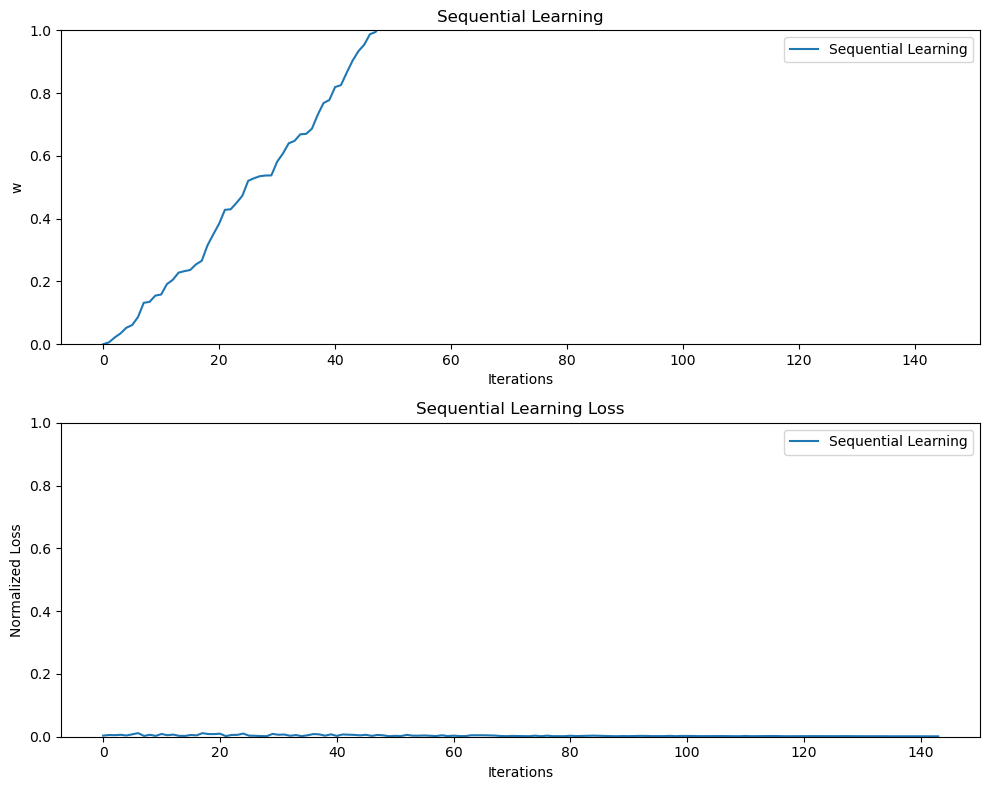

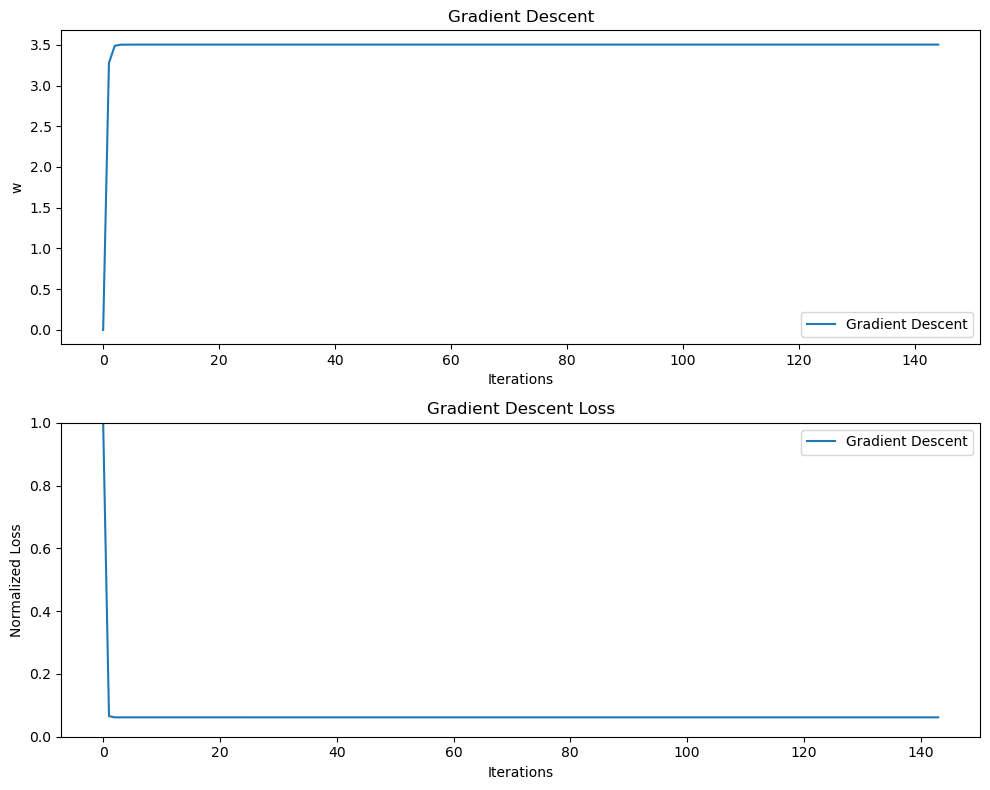

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# 生成数据
X = np.random.rand(144)
y = 2*X + 1 + np.random.randn(144) * 0.02

# 初始化参数
w_seq = 0
w_grad = 0

# 存储参数结果和损失
w_seq_history = [w_seq]
w_grad_history = [w_grad]
loss_seq_history = []
loss_grad_history = []

# 顺序学习
for i in range(144):  # 增加迭代次数以体现收敛性
    xi = X[i]
    yi = y[i]
    loss = (yi - w_seq*xi)**2
    grad = -2*xi*(yi - w_seq*xi)
    w_seq = w_seq - 0.01*grad

    # 保存参数和损失历史
    w_seq_history.append(w_seq)
    loss_seq_history.append(loss)

# 梯度下降
for i in range(144):  # 增加迭代次数以体现收敛性
    loss = np.sum((y - w_grad*X)**2)
    grad = -2*np.sum(X*(y - w_grad*X))
    w_grad = w_grad - 0.01*grad

    # 保存参数和损失历史
    w_grad_history.append(w_grad)
    loss_grad_history.append(loss)

# 统一损失尺度
max_loss = max(max(loss_seq_history), max(loss_grad_history))
loss_seq_history = [loss / max_loss for loss in loss_seq_history]
loss_grad_history = [loss / max_loss for loss in loss_grad_history]

# 画图
plt.figure(figsize=(10, 8))

# 顺序学习的参数更新和损失
plt.subplot(2, 1, 1)
plt.plot(w_seq_history, label='Sequential Learning')
plt.title('Sequential Learning')
plt.xlabel('Iterations')
plt.ylabel('w')
plt.ylim(bottom=0, top=1)
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(loss_seq_history, label='Sequential Learning')
plt.title('Sequential Learning Loss')
plt.xlabel('Iterations')
plt.ylabel('Normalized Loss')
plt.ylim(bottom=0, top=1)
plt.legend()

plt.tight_layout()
plt.show()

# 画图
plt.figure(figsize=(10, 8))

# 梯度下降的参数更新和损失
plt.subplot(2, 1, 1)
plt.plot(w_grad_history, label='Gradient Descent')
plt.title('Gradient Descent')
plt.xlabel('Iterations')
plt.ylabel('w')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(loss_grad_history, label='Gradient Descent')
plt.title('Gradient Descent Loss')
plt.xlabel('Iterations')
plt.ylabel('Normalized Loss')
plt.ylim(bottom=0, top=1)
plt.legend()

plt.tight_layout()
plt.show()


## 3.1.4 正则化最小平方
## （Regularized Least Squares）
1. **L1 正则化（Lasso 正则化）**：
L1 正则化通过在损失函数中添加参数的绝对值之和作为正则化项来限制模型参数的大小。它的数学表达式为：

L1 正则化项 = λ * Σ|θᵢ|

其中：
- λ 是正则化强度参数，用户可以调整以控制正则化的影响程度。
- θᵢ 是模型的第 i 个参数。

L1 正则化有一个有趣的性质，它倾向于将某些模型参数的值压缩为零，从而实现特征选择。这意味着对于某些不重要的特征，它们的对应参数可能会被正则化到零，从而减少了模型的复杂度和特征的数量。

2. **L2 正则化（岭正则化）**：
L2 正则化通过在损失函数中添加参数的平方和作为正则化项来限制模型参数的大小。它的数学表达式为：

L2 正则化项 = λ * Σθᵢ²

其中：
- λ 是正则化强度参数，同样可以由用户调整。

L2 正则化的主要作用是防止模型参数过大，从而减少过拟合。与 L1 正则化不同，L2 正则化不会将参数压缩到零，而是倾向于减小参数的大小但不完全消除它们。

总结：
- L1 正则化倾向于稀疏化模型，使得一些参数为零，适合特征选择。
- L2 正则化通过减小参数的大小来避免过拟合，适合在共线性较强的情况下使用。

- 现在我们开始推导：
总误差函数的形式为：
$$
E(w) = E_D(w) + \lambda E_W(w) \quad (3.24)
$$
其中，$\lambda$是正则化参数，控制着数据相关误差$E_D(w)$和正则项$E_W(w)$的相对重要性。其中一种简单的正则项是加权向量元素的平方和：
$$
E_W(w) = \frac{1}{2} w^T w \quad (3.25)
$$
如果我们考虑平方和误差函数：
$$
E(w) = \frac{1}{2} \sum_{n=1}^N \{t_n - w^T \phi(x_n)\}^2 \quad (3.26)
$$
则总误差函数变为：
$$
E(w) = \frac{1}{2} \sum_{n=1}^N \{t_n - w^T \phi(x_n)\}^2 + \frac{\lambda}{2} w^T w \quad (3.27)
$$
由于顺序学习算法倾向于将权重向零方向调整，这种正则项的选择在机器学习文献中被称为“权重衰减”（Weight Decay）。在统计学中，由于它使参数趋近于零，它也是“参数收缩”方法的一个例子。这种方法的好处在于，误差函数变成了$w$的二次函数，从而可以得到精确的最小值解析解。具体地，对式（3.27）关于$w$求梯度并令其等于0，我们得到：
$$
w = (\lambda I + \Phi^T \Phi)^{-1} \Phi^T t \quad (3.28)
$$


这是最小二乘解（3.15）的一个简单扩展。有时会使用更一般形式的正则项，如：
$$
E(w) = \frac{1}{2} \sum_{n=1}^N \{t_n - w^T \phi(x_n)\}^2 + \frac{\lambda}{2} \sum_{j=1}^M |w_j|^q \quad (3.29)
$$
<center><img alt="image-20230806072347190" src="image-20230806072347190.png"/></center>

其中$q=2$对应二次正则项（3.27）。图3.3展示了不同$q$值下的正则化函数的等高线。



当$q=1$时，正则项在统计文献中被称为“Lasso”（Tibshirani, 1996）。当$\lambda$取较大值时，部分系数$w_j$会被压缩到零，导致对应的基函数不起作用。为了证明这一点，首先注意最小化式（3.29）等价于最小化满足约束条件：
$$
\sum_{j=1}^M |w_j|^q \leq \eta \quad (3.30)
$$
的未正则化平方和误差（3.12）。这样，两种方法通过拉格朗日乘数法联系起来。

图3.4展示了稀疏性的来源：在限制条件（3.30）下，误差函数达到最小值。随着$\lambda$的增加，越来越多的参数变为零。

<center><img alt="image-20230806072407216" src="image-20230806072407216.png"/></center>

正则化最小二乘问题仍然有闭式解:
$$
w = (X^T X + λI)^{-1}X^T y
$$
但是正则化系数λ的选择需要通过交叉验证或者贝叶斯模型比较的方法来确定。

**后日谈**：
还记得我们之前举例的小猫MAX案例么？高斯基函数的表现欠佳，那么我们怎么在不更换基函数的前提下，解决过拟合的问题呢？
*这里我们采用岭回归，增加L2正则化项。*


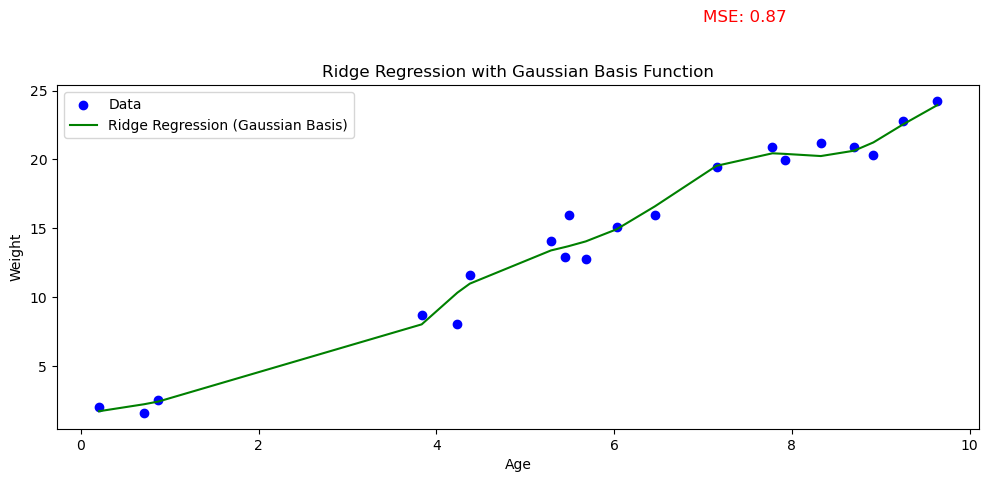

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

# 生成模拟数据
np.random.seed(0)
age = np.sort(np.random.uniform(0, 10, 20))  # 小猫的年龄
weight = 2.5 * age + np.random.normal(0, 1, 20)  # 小猫吃什么，带有一些随机噪音

# 高斯基函数
centers = np.linspace(0, 10, 5)  # 高斯基函数的中心点
s = 1.0  # 高斯基函数的标准差
X_gaussian = np.exp(-(age[:, np.newaxis] - centers)**2 / (2 * s**2))  # 生成高斯基函数矩阵

# 岭回归（正则化）
alpha = 0.02 # 正则化参数
ridge = Ridge(alpha=alpha)
ridge.fit(X_gaussian, weight)
weight_pred_ridge = ridge.predict(X_gaussian)

# 计算均方误差
mse = mean_squared_error(weight, weight_pred_ridge)

# 可视化结果
plt.figure(figsize=(10, 5))

# 高斯基函数
plt.scatter(age, weight, label='Data', color='blue')
plt.plot(age, weight_pred_ridge, label='Ridge Regression (Gaussian Basis)', color='green')
plt.xlabel('Age')
plt.ylabel('Weight')
plt.title('Ridge Regression with Gaussian Basis Function')
plt.legend()
plt.text(7, 30, f'MSE: {mse:.2f}', fontsize=12, color='red')

plt.tight_layout()
plt.show()


###小知识时间：
均方误差（Mean Squared Error，MSE）是在统计学和机器学习中常用的衡量预测模型性能的指标之一。它用于度量模型预测值与实际观测值之间的差异程度，从而评估模型的准确性。
MSE 的计算步骤如下：

1. 对每个样本，计算模型的预测值。
2. 计算每个样本的预测值与实际观测值之差的平方。
3. 对所有样本的平方差值求平均。

数学公式表示为：
$$
MSE = Σ(yᵢ - ŷᵢ)² / n
$$
其中：
- yᵢ 是第 i 个样本的实际观测值。
- ŷᵢ 是模型对第 i 个样本的预测值。
- n 是样本总数。

MSE 衡量了模型预测值与实际观测值之间的平均差异的平方。因为平方会放大较大的误差，所以较大的误差会对最终的 MSE 值产生更大的影响。MSE 越小，表示模型的预测越接近真实观测值，模型性能越好。

然而，需要注意的是，MSE 也有一些局限性。例如，它对异常值（极端值）比较敏感，因为平方会放大异常值的影响。此外，MSE 对于不同量纲的特征可能会导致问题，因为各个特征的平方误差在计算时可能会有不同的影响。


## 3.1.5 多个输出
## （Multiple Outputs）

在前面几个章节的学习中，我们只考虑到了单个目标变量 $t$ 的情况。但是在某些情景中，我们可能需要预测多于一个的目标变量，记作目标向量 ，$t$其中 $K > 1$。我们可以通过为  的每$t$个分量引入不同的基函数集合，将问题转化为多个独立的回归问题。然而，更常用且有趣的方法是使用相同的基函数集合对目标向量的所有分量建模，即：
$$
y(x,w) = W^T\phi(x) \quad (3.31)
$$
其中，$\(y\)$ 是一个 $\(K\)$ 维列向量，$\(W\)$ 是一个 $\(M \times K\)$ 参数矩阵，$\(\phi(x)\)$ 是一个由元素 $\(\phi_j(x)\)$ 构成的 $\(M\)$ 维列向量，且与之前一样，$\(\phi_0(x) = 1\)$。假设目标向量的条件概率分布采用以下形式：
$$
p(t|x,W,\beta)=\mathcal{N}(t|W^T\phi(x),\beta^{-1}I) \quad (3.32)
$$
这是一个各向同性的高斯分布，其中 $\(\beta\)$ 是精度参数。如果我们有观测集合 $\(t_1, ..., t_N\)$，我们可以将它们组合成大小为 $\(N \times K\)$ 的矩阵 $\(T\)$，其中第 $\(n^{th}\)$ 行为 $\(t_n^T\)$。同样地，我们可以将输入向量 $\(x_1, ..., x_N\)$ 组合成矩阵 $\(X\)$。对数似然函数为：
$$
\ln p(T|X,W,\beta) = \sum_{n=1}^N \ln \mathcal{N}(t_n|W^T\phi(x_n),\beta^{-1}I)
= \frac{NK}{2} \ln \left(\frac{\beta}{2\pi}\right) - \frac{\beta}{2} \sum_{n=1}^N \| t_n - W^T\phi(x_n) \|^2 \quad (3.33)
$$
与之前一样，我们可以通过对$W$求最大化来得到解：
$$
w_k = (\Phi^T\Phi)^{-1}\Phi^Tt_k = \Phi^+t_k \quad (3.34)
$$
将这个结果应用于每个目标变量 $t_k$，我们得到：
$$
w_k = (\Phi^T\Phi)^{-1}\Phi^Tt_k = \Phi^+t_k \quad (3.35)
$$
其中，$\(t_k\)$ 是维度为 $\(N\)$，分量为 $\(t_{nk}, n=1,...,N\)$ 的列向量。因此，多输出问题的解是根据不同目标变量分解的，且只需要计算一次由所有向量 $\(w_k\)$ 共享的伪逆矩阵 $\(\Phi^+\)$。

这个方法可以直接推广到具有任意协方差矩阵的一般高斯噪声分布。同样地，这个问题可以分解为 $\(K\)$ 个独立的回归问题。由于参数 $\(W\)$ 只定义了高斯噪声分布的均值，且从第 2.3.4 节中可知多元高斯均值的最大似然解与协方差无关。

**后日谈**：
假设我们有5只猫，每只猫有3个属性：体重（kg）、年龄（月）、毛色（1-白，2-黑，3-花），假设我们有一些特征来描述猫，例如喜欢的食物和玩具数量；
现在多来了一个喜欢吃鸟，有三个玩具的猫，我们可以通过目标向量预测猫的体重、年龄和毛色：

In [9]:
import numpy as np
from numpy.linalg import pinv

# 猫的属性向量被表示为一个矩阵，每行代表一只猫的属性向量
attributes = np.array([
    [4.5, 12, 3],
    [3.8, 8, 1],
    [5.2, 18, 2],
    [4.0, 10, 1],
    [4.9, 15, 3]
])

# 假设我们有一些特征来描述猫，例如喜欢的食物和玩具数量
# 特征矩阵，每行代表一只猫的特征向量
features = np.array([
    ['鱼', 3],
    ['鸟', 2],
    ['肉', 4],
    ['鸟', 1],
    ['鱼', 2]
])

# 将非数值特征转换为数值特征，例如将食物转换为数字
food_mapping = {'鱼': 1, '鸟': 2, '肉': 3}
features[:, 0] = [food_mapping[food] for food in features[:, 0]]

# 构建设计矩阵 phi(x)，这里简化为直接使用 features
phi = np.hstack((np.ones((features.shape[0], 1)), features.astype(float)))

# 目标属性矩阵
target_attributes = attributes

# 计算参数矩阵 W，使用伪逆
W = np.dot(pinv(phi), target_attributes)

# 假设有一只新猫的特征，我们可以预测其属性向量
new_feature = np.array([2, 3])  # 假设喜欢鸟类食物，有3个玩具
new_phi = np.hstack((1, new_feature))
predicted_attributes = np.dot(new_phi, W)

print("预测的属性向量：", predicted_attributes)


预测的属性向量： [ 4.7        14.07936508  2.19047619]



## 3.2 偏差-方差分解
## (Bias-Variance Decomposition)

在前面几个章节，我们得出了最优预测函数 $h(x)$ 的表达式。这使得平方损失的期望可以重新表述为：
$$
\mathbb{E}[L] = \int \{y(x) - h(x)\}^2 p(x) dx + \iint \{h(x) - t\}^2 p(x, t) dx dt \quad (3.37)
$$
在实际应用中，我们通过数据集 $\(D\)$ 来确定预测函数 $\(y(x;D)\)$，于是上式的第一项可以展开为：
$$
\{ y(x;D) - E_D[y(x;D)]  +  E_D[y(x;D)] - h(x) \}^2 = \{ y(x;D) - E_D[y(x;D)] \}^2+\{ E_D[y(x;D)] - h(x) \}^2 + 2 \{ y(x;D) - E_D[y(x;D)] \} \{ E_D[y(x;D)] - h(x) \} \quad (3.39)
$$
接着，我们将对数据集的期望引入到这些项中，得到：
$$
\mathbb{E}_D \left[ \{ y(x;D) - h(x) \}^2 \right] = \{ E_D[y(x;D)] - h(x) \}^2 + \mathbb{E}_D \left[ \{ y(x;D) - E_D[y(x;D)] \}^2 \right]\quad (3.40)
$$
这个拆分将期望损失拆分成了偏差项的平方和方差项。偏差项衡量了在所有数据集上的平均预测与期望的回归函数之间的差异，而方差项衡量了模型在单独数据集上的预测与平均预测之间的波动程度。

将这些项代回期望损失的分解式中，我们得到：
$$
\text{期望损失} = (\text{偏差})^2 + \text{方差} + \text{噪声} \quad (3.41)
$$
其中：

- 偏差的平方项：$\text{(bias)}^2 = \int \{ E_D[y(x;D)] - h(x) \}^2 p(x) dx \quad (3.42)$
- 方差项：$\text{variance} = \int \mathbb{E}_D \left[ \{ y(x;D) - E_D[y(x;D)] \}^2 \right] p(x) dx\quad (3.43)$
- 噪声项：$\text{noise} = \iint \{ h(x) - t \}^2 p(x, t) dx dt\quad (3.44)$

通过引入不同的正则化系数 $\lambda$，我们可以在偏差和方差之间做权衡。较小的可 $\lambda$能会导致模型对数据集中的噪声过拟合，从而产生较大的方差。相反，较大的 $\lambda$会将权重参数推向零，导致较大的偏差。

<center><img alt="image-20230806071950887" src="image-20230806071950887.png"/><center>

<center><img alt="image-20230806071833056" src="image-20230806071833056.png"/><center>

通过实验，我们可以观察到不同 $\lambda$对于偏差和方差的影响，以及如何在二者之间找到一个平衡点。然而，偏差-方差分解在实际应用中有一些局限性，因为它依赖于对多个数据集的平均，而实际上我们通常只有一个数据集。

**后日谈**：
那么我们应该如何在不同复杂度的模型中权衡偏差和方差呢？


Degree 1 Model:
Training MSE: 0.1547, Testing MSE: 0.1852

Degree 4 Model:
Training MSE: 0.0011, Testing MSE: 0.0018

Degree 15 Model:
Training MSE: 0.0005, Testing MSE: 0.0017



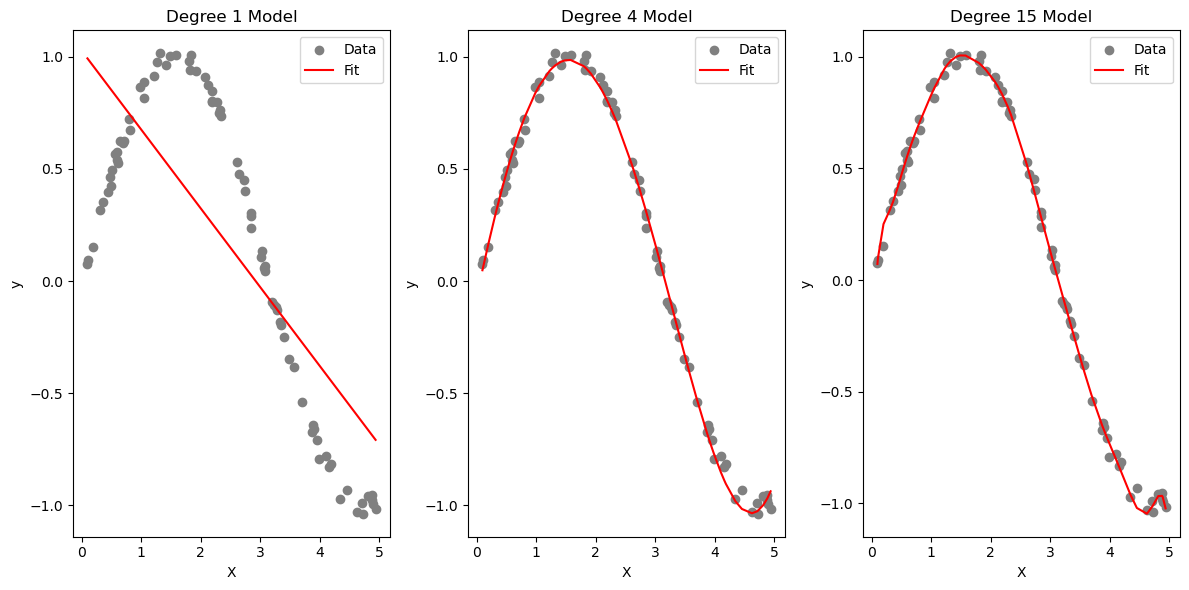

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# 生成模拟数据
np.random.seed(0)
X = np.sort(5 * np.random.rand(80, 1), axis=0)
y = np.sin(X).ravel() + 0.1 * (np.random.rand(80) - 0.5)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# 不同复杂度的模型
models = [LinearRegression(), LinearRegression(), LinearRegression()]
model_degrees = [1, 4, 15]  # 多项式的次数

plt.figure(figsize=(12, 6))
for i, model in enumerate(models):
    degree = model_degrees[i]

    # 对训练数据进行多项式特征转换
    X_train_poly = np.vander(X_train.ravel(), degree + 1, increasing=True)
    X_test_poly = np.vander(X_test.ravel(), degree + 1, increasing=True)

    # 拟合模型
    model.fit(X_train_poly, y_train)
    y_train_pred = model.predict(X_train_poly)
    y_test_pred = model.predict(X_test_poly)

    # 绘制拟合结果
    plt.subplot(1, 3, i + 1)
    plt.scatter(X, y, color='gray', label='Data')
    plt.plot(X, model.predict(np.vander(X.ravel(), degree + 1, increasing=True)), color='red', label='Fit')
    plt.title(f'Degree {degree} Model')
    plt.xlabel('X')
    plt.ylabel('y')
    plt.legend()

    # 计算均方误差
    train_mse = mean_squared_error(y_train, y_train_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)
    print(f'Degree {degree} Model:')
    print(f'Training MSE: {train_mse:.4f}, Testing MSE: {test_mse:.4f}\n')

plt.tight_layout()
plt.show()


我们可以发现：
- 线性模型（一阶多项式）具有较高的偏差（拟合不足）和较低的方差，导致拟合不够灵活。
- 15次多项式模型具有较低的偏差（拟合充足），但是方差很高，容易受到噪声的影响，导致过拟合。

我们发现：低复杂度模型（高偏差低方差）更容易欠拟合，而高复杂度模型（低偏差高方差）更容易过拟合。
在实际应用中，我们需要找到一个合适的模型复杂度，以在偏差和方差之间取得平衡。